# I. Réduction de dimensions et Visualisation des données

## 1.  imports du jeu de données

In [78]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [79]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

## 2. Analyse des composantes principales

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Variance par chaque composante principale :
[10.80999558  1.45184229  0.0581652   0.03279996  0.01406283  0.00621041
  0.00523837  0.00406512  0.00187861  0.00145726  0.0010361   0.00034505]

Ratio de variance par chaque composante principale :
[0.87268193 0.11720602 0.00469563 0.00264791 0.00113528 0.00050136
 0.00042289 0.00032817 0.00015166 0.00011764 0.00008364 0.00002786]

Composantes principales (axes) :
[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]
nb axes:  2


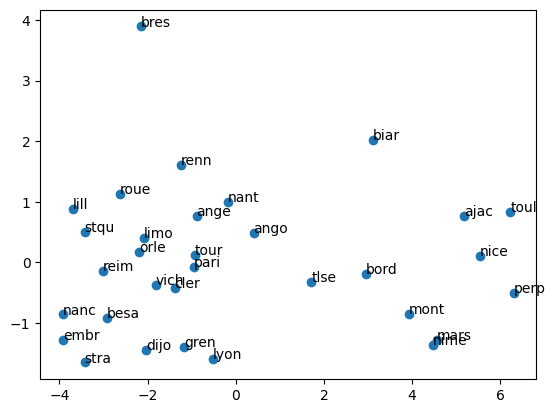

In [81]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance par chaque composante principale :")
print(explained_variance)
print("\nRatio de variance par chaque composante principale :")
print(explained_variance_ratio)
components = pca.components_
print("\nComposantes principales (axes) :")
print(components[:2])

pourcentage_cumulatif = np.cumsum(explained_variance) / np.sum(explained_variance)
nombre_axes_necessaires = np.argmax(pourcentage_cumulatif >= 0.90) + 1
print("nb axes: ", nombre_axes_necessaires)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


## 3.  Réaliser une Analyse en Composantes Principales pour crimes.csv

Variance expliquée par chaque composante principale :
[4.19893828 1.26400187 0.74062921 0.32288984 0.26323924 0.22657089
 0.12658781]

Ratio de variance expliquée par chaque composante principale :
[0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]

Composantes principales (axes) :
[[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [ 0.62917444  0.16943512 -0.04224698  0.34352815 -0.20334059 -0.40231912
  -0.50242093]]
nb axes:  4


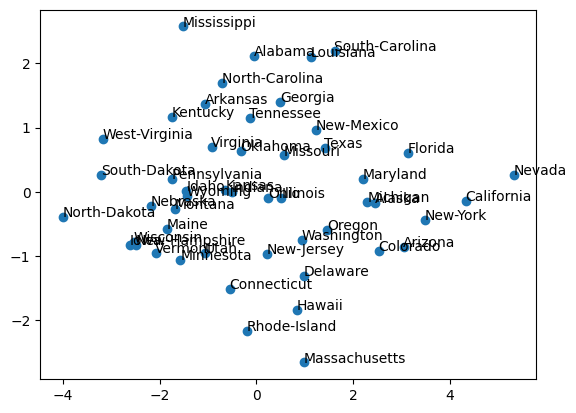

In [82]:
data = pd.read_csv('./crimes.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)
print("\nRatio de variance expliquée par chaque composante principale :")
print(explained_variance_ratio)

components = pca.components_
print("\nComposantes principales (axes) :")
print(components[:2])

pourcentage_cumulatif = np.cumsum(explained_variance) / np.sum(explained_variance)
nombre_axes_necessaires = np.argmax(pourcentage_cumulatif >= 0.90) + 1
print("nb axes: ", nombre_axes_necessaires)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## 4.  Réaliser une Analyse en Composantes Principales pour 50_Startups.csv


Variance expliquée par chaque composante principale :
[2.7267099  1.04019163 0.28830861 0.02642251]

Ratio de variance expliquée par chaque composante principale :
[0.66804393 0.25484695 0.07063561 0.00647351]

Composantes principales (axes) :
[[ 0.59347855  0.14737886  0.52064694  0.59580992]
 [ 0.04048087  0.95051314 -0.30797098 -0.00632069]]
nb axes:  2


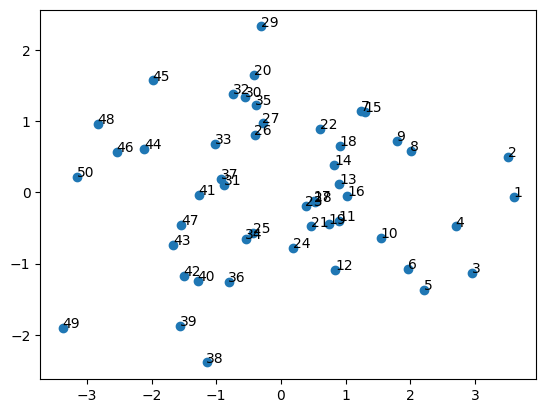

In [83]:
data = pd.read_csv('./50_Startups.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()

X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)
print("\nRatio de variance expliquée par chaque composante principale :")
print(explained_variance_ratio)

components = pca.components_
print("\nComposantes principales (axes) :")
print(components[:2])

pourcentage_cumulatif = np.cumsum(explained_variance) / np.sum(explained_variance)
nombre_axes_necessaires = np.argmax(pourcentage_cumulatif >= 0.90) + 1
print("nb axes: ", nombre_axes_necessaires)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## 5.  Réaliser une Analyse en Composantes Principales pour mammals.csv

Variance expliquée par chaque composante principale :
[4.88046969 2.24407727 1.28123625 0.65944291 0.4816746  0.26505957
 0.18272155 0.09360741 0.05096531 0.02467987]

Ratio de variance expliquée par chaque composante principale :
[0.48017524 0.22078825 0.12605711 0.06488067 0.04739057 0.02607844
 0.01797744 0.00920976 0.00501433 0.00242818]

Composantes principales (axes) :
[[ 0.59347855  0.14737886  0.52064694  0.59580992]
 [ 0.04048087  0.95051314 -0.30797098 -0.00632069]]
nb axes:  5


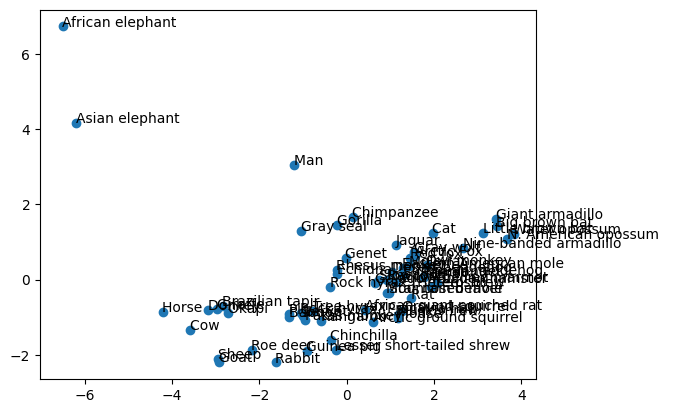

In [84]:
data = pd.read_csv('./mammals.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()

X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)

print("\nRatio de variance expliquée par chaque composante principale :")
print(explained_variance_ratio)

print("\nComposantes principales (axes) :")
print(components[:2])


pourcentage_cumulatif = np.cumsum(explained_variance) / np.sum(explained_variance)
nombre_axes_necessaires = np.argmax(pourcentage_cumulatif >= 0.90) + 1
print("nb axes: ", nombre_axes_necessaires)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


# II. Clustering

## 1. Application de la procedure KMeans afin dóbtenir les trois clusters


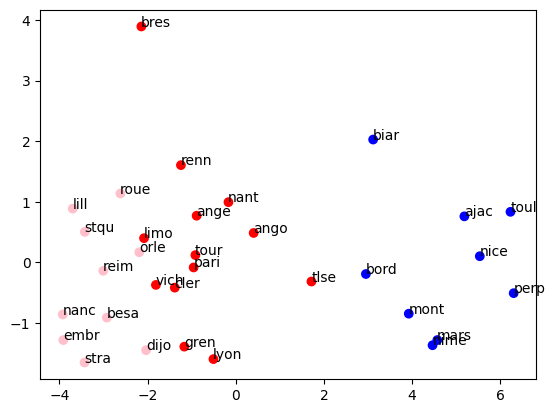

In [85]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


from sklearn.cluster import KMeans
import matplotlib.colors as plt_colors

kmeans = KMeans(n_clusters=3, random_state=0)
clustering = kmeans.fit_predict(X_pca)

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=plt_colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


## 2. Application de la procedure AgglomerativeClustering et comparaison des différentes méthodes d’agrégation

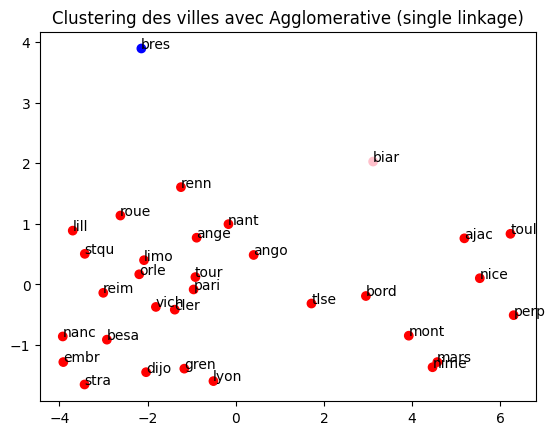

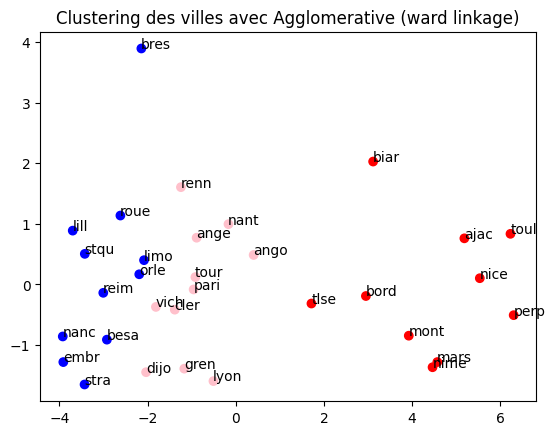

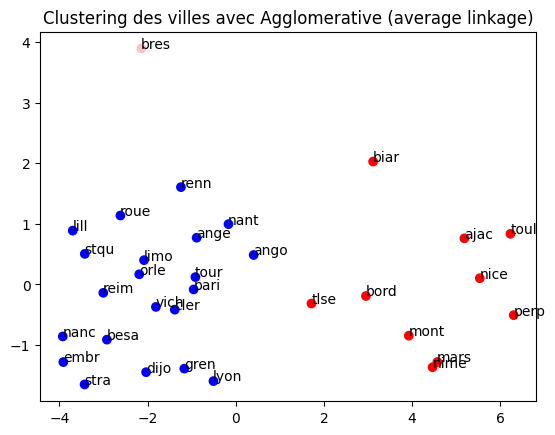

In [86]:
from sklearn.cluster import AgglomerativeClustering

methods = ['single', 'ward', 'average']

for method in methods:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    cluster_labels = clustering.fit_predict(X_pca)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap=plt_colors.ListedColormap(colors))
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.title(f'Clustering des villes avec Agglomerative ({method} linkage)')
    plt.show()


## 3. Deduction de la meilleure partition

In [87]:
from sklearn import metrics
import numpy as np

silhouette_scores = []
davies_bouldin_scores = []

for i in range(2, 10):
    clustering = KMeans(n_clusters=i, random_state=0).fit_predict(X)

    silhouette_score = metrics.silhouette_score(X, clustering, metric='euclidean')
    davies_bouldin_score = metrics.davies_bouldin_score(X, clustering)

    silhouette_scores.append(silhouette_score)
    davies_bouldin_scores.append(davies_bouldin_score)

    print(f"Nombre de clusters : {i}")
    print(f"Score Silhouette : {silhouette_score}")
    print(f"Score Davies-Bouldin : {davies_bouldin_score}")

best_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car nous avons commencé à partir de 2 clusters
print(f"Meilleur nombre de clusters selon le score Silhouette : {best_num_clusters}")


Nombre de clusters : 2
Score Silhouette : 0.6181156437258204
Score Davies-Bouldin : 0.5255144256507587
Nombre de clusters : 3
Score Silhouette : 0.3717690143465151
Score Davies-Bouldin : 0.879754465835481
Nombre de clusters : 4
Score Silhouette : 0.3553138196253386
Score Davies-Bouldin : 0.9446243493464896
Nombre de clusters : 5
Score Silhouette : 0.34470937861332906
Score Davies-Bouldin : 0.8374186699128978
Nombre de clusters : 6
Score Silhouette : 0.2823345521108724
Score Davies-Bouldin : 0.8718365309989499
Nombre de clusters : 7
Score Silhouette : 0.28840756273325174
Score Davies-Bouldin : 0.7651885445682145
Nombre de clusters : 8
Score Silhouette : 0.35685252259121203
Score Davies-Bouldin : 0.6648434069499305
Nombre de clusters : 9
Score Silhouette : 0.4071115201359237
Score Davies-Bouldin : 0.5406589932019961
Meilleur nombre de clusters selon le score Silhouette : 2


## 5. Fonction pour determiner le meilleurs algorithme et la taille la plus optimale pour faire le cluster

In [88]:
def compare_clustering_algorithms(X, num_clusters_range=None):
    if num_clusters_range is None:
        num_clusters_range = range(2, 10)
    algorithms = [
        {'name': 'K-Means', 'clusterer': KMeans},
        {'name': 'Agglomerative (Single)', 'clusterer': AgglomerativeClustering, 'linkage': 'single'},
        {'name': 'Agglomerative (Ward)', 'clusterer': AgglomerativeClustering, 'linkage': 'ward'},
        {'name': 'Agglomerative (Average)', 'clusterer': AgglomerativeClustering, 'linkage': 'average'}
    ]
    best_score = -1
    best_algorithm = None
    best_num_clusters = -1
    for algorithm_info in algorithms:
        for num_clusters in num_clusters_range:
            if 'linkage' in algorithm_info:
                clusterer = algorithm_info['clusterer'](n_clusters=num_clusters, linkage=algorithm_info['linkage'])
            else:
                clusterer = algorithm_info['clusterer'](n_clusters=num_clusters)
            clustering = clusterer.fit_predict(X)
            silhouette_score = metrics.silhouette_score(X, clustering, metric='euclidean')
            davies_bouldin_score = metrics.davies_bouldin_score(X, clustering)
            score = silhouette_score
            if score > best_score:
                best_score = score
                best_algorithm = algorithm_info['name']
                best_num_clusters = num_clusters
    return best_algorithm, best_num_clusters

